In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import  scipy.stats
pd.options.display.float_format = '{:,.2f}'.format

C:\Users\nsnip\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Adjust graph size
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
from IPython.core.display import display, HTML
#Increase output window size
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
df=pd.read_excel('RD.xlsx')

In [5]:
#Add feild MIncome - Monthly Household Income
df['MIncome'] = (df['HHIncome']/12)

In [6]:
#Add feild SpendToIncome - Ratio of monthly spending to monthly household income
df['SpendToIncome'] = df['CardSpendMonth']/df['MIncome']

In [7]:
# Add feild AgeBracket, splitting the group age into groups of approx 10 years
conditions = [df['Age'] <= 25,
              df['Age'] <= 35,
              df['Age'] <= 45,
              df['Age'] <= 55,
              df['Age'] <= 65
             ]
selections = ['18-25','26-35','36-45','46-55','56-65']
df['AgeBracket'] = np.select(conditions,selections,'65+')

In [8]:
# Add feild EduBracket, splitting the group age into groups of approx 10 years
conditions = [df['EducationYears'] <= 8,
              df['EducationYears'] <= 12,
              df['EducationYears'] <= 16
             ]
selections = ['1. Elementary','2. Secondary','3. Post-Secondary']
df['EduBracket'] = np.select(conditions,selections,'4. Graduate')

In [9]:
#View simple numerical statistics on all feilds
df.describe()

Region  TownSize      Age  EducationYears     HHIncome  \
count 5,000.00  5,000.00 5,000.00        5,000.00     5,000.00   
mean      3.00      2.69    47.03           14.54    54,759.60   
std       1.42      1.43    17.77            3.28    55,377.51   
min       1.00      1.00    18.00            6.00     9,000.00   
25%       2.00      1.00    31.00           12.00    24,000.00   
50%       3.00      3.00    47.00           14.00    38,000.00   
75%       4.00      4.00    62.00           17.00    67,000.00   
max       5.00      5.00    79.00           23.00 1,073,000.00   

       DebtToIncomeRatio  HouseholdSize  HomeOwner  CardSpendMonth  Internet  \
count           5,000.00       5,000.00   5,000.00        5,000.00  5,000.00   
mean                9.95           2.20       0.63        3,372.03      1.20   
std                 6.40           1.39       0.48        2,451.45      1.45   
min                 0.00           1.00       0.00            0.00      0.00   
25%                 5.10           1.00       0.00        1,833.77      0.00   
50%                 8.80           2.00       1.00        2,763.60      1.00   
75%                13.60           3.00       1.00        4,185.38      2.00   
max                43.10           9.00       1.00       39,264.10      4.00   

        MIncome  SpendToIncome  
count  5,000.00       5,000.00  
mean   4,563.30           1.08  
std    4,614.79           0.88  
min      750.00           0.00  
25%    2,000.00           0.48  
50%    3,166.67           0.83  
75%    5,583.33           1.40  
max   89,416.67           8.75

In [10]:
#Split HHIncome into 5 sections and SpendToIncome into 10 sections
#HHIncomeBracket only contains the low value of the bracket to assist with ordering of the tables and graphs
df['HHIncomeBracket']=pd.qcut(df.HHIncome,5).astype(str).str.strip('()[]').str.split(', ').str[0].astype(np.float64)
df['SpendToIncomeBracket']=pd.qcut(df.SpendToIncome,10).astype(str)#.str.strip('()[]').str.replace(', ','-')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FFC646DD8>]],
      dtype=object)

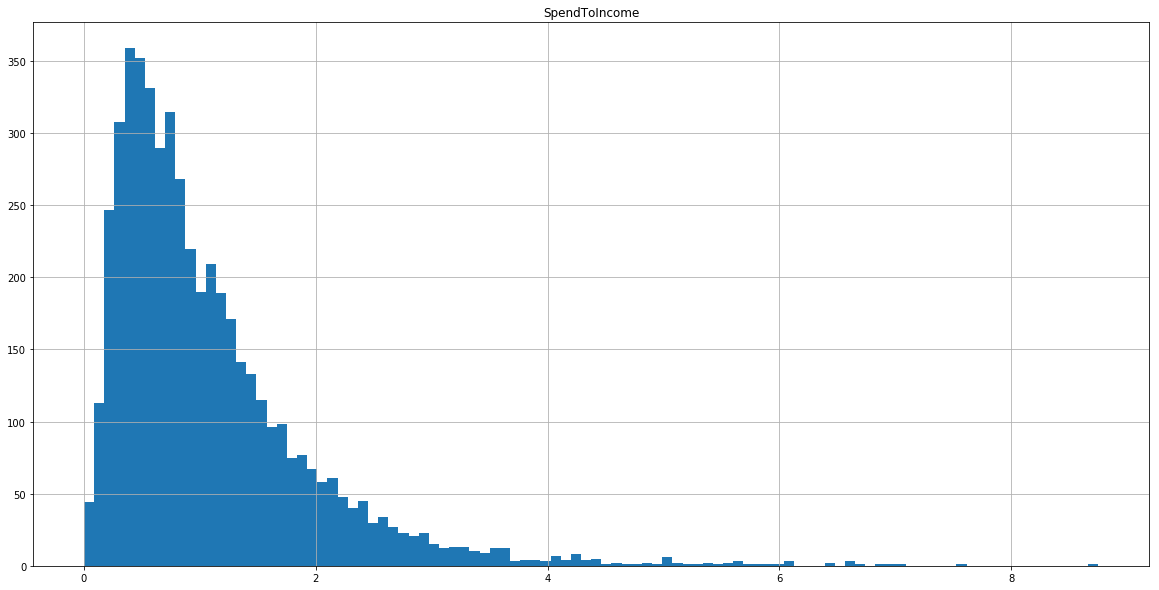

In [11]:
df.hist('SpendToIncome',bins=100)


 Mean


SpendToIncome
LoanDefault               
No                    1.06
Yes                   1.13


 Count


SpendToIncome
LoanDefault               
No                    3829
Yes                   1171


 %


SpendToIncome
LoanDefault               
No                    0.77
Yes                   0.23
All                   1.00

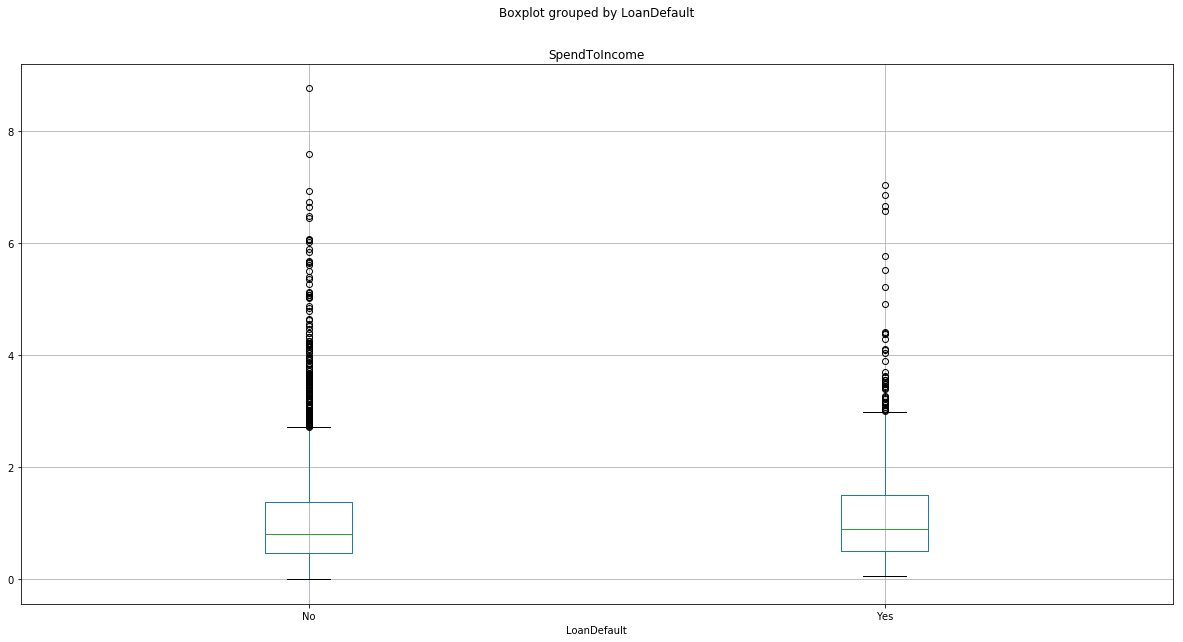

In [12]:
#Bivariate Analysis of LoanDefault and SpendToIncome
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               values='SpendToIncome',
              aggfunc='count'))
table = pd.pivot_table(df,
               index=['LoanDefault'],
               values='SpendToIncome',
              aggfunc=len,margins=True)
table3 = table.div( table.iloc[-1,:], axis=1 )

print('\n','%')
display(table3)
display(df.boxplot('SpendToIncome','LoanDefault'))


 Mean


Region         1    2    3    4    5
LoanDefault                         
No          1.07 1.09 1.01 1.06 1.08
Yes         1.18 1.15 1.03 1.10 1.19


 Count


Region             1      2        3      4        5      All
LoanDefault                                                  
No            783.00 739.00   776.00 731.00   800.00 3,829.00
Yes           226.00 256.00   227.00 235.00   227.00 1,171.00
All         1,009.00 995.00 1,003.00 966.00 1,027.00 5,000.00


 % Row


Region         1    2    3    4    5  All
LoanDefault                              
No          0.20 0.19 0.20 0.19 0.21 1.00
Yes         0.19 0.22 0.19 0.20 0.19 1.00
All         0.20 0.20 0.20 0.19 0.21 1.00


 % Column


Region         1    2    3    4    5  All
LoanDefault                              
No          0.78 0.74 0.77 0.76 0.78 0.77
Yes         0.22 0.26 0.23 0.24 0.22 0.23
All         1.00 1.00 1.00 1.00 1.00 1.00

Chi-Square: 5.3272788589449345
p: 0.2553340996970102


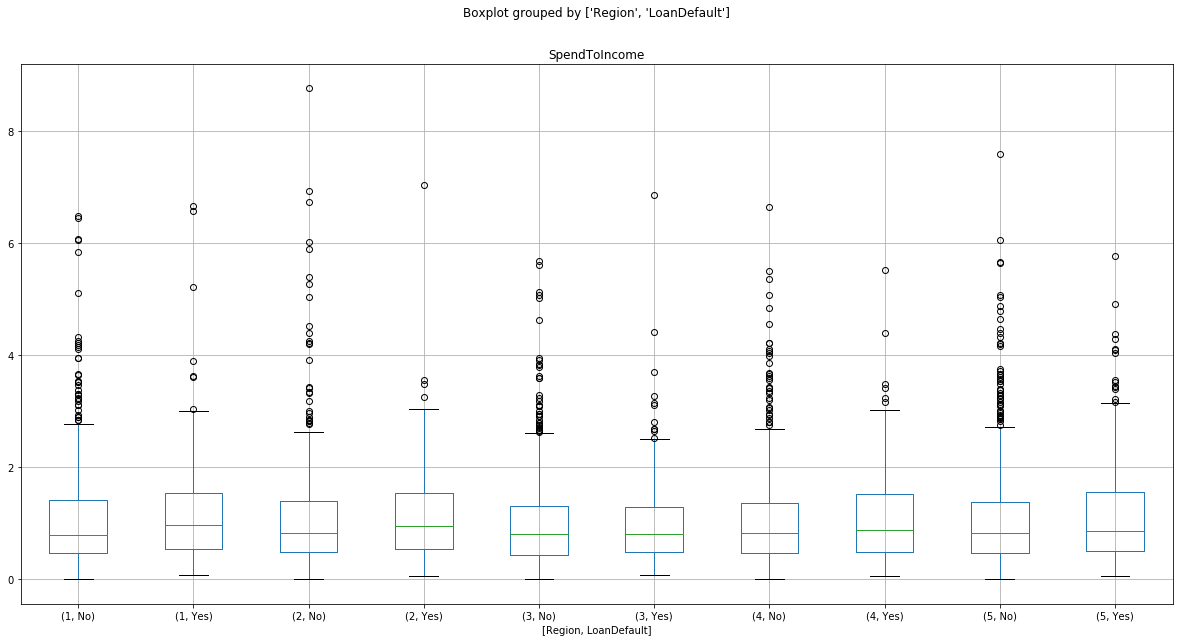

In [13]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Region
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Region',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Region',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Region and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Region'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Region','LoanDefault'])


 Mean


Gender       Female  Male  Undisclosed
LoanDefault                           
No             1.01  1.12         0.83
Yes            1.08  1.18         1.04


 Count


Gender        Female     Male  Undisclosed      All
LoanDefault                                        
No          1,913.00 1,892.00        24.00 3,829.00
Yes           581.00   581.00         9.00 1,171.00
All         2,494.00 2,473.00        33.00 5,000.00


 % Row


Gender       Female  Male  Undisclosed  All
LoanDefault                                
No             0.50  0.49         0.01 1.00
Yes            0.50  0.50         0.01 1.00
All            0.50  0.49         0.01 1.00


 % Column


Gender       Female  Male  Undisclosed  All
LoanDefault                                
No             0.77  0.77         0.73 0.77
Yes            0.23  0.23         0.27 0.23
All            1.00  1.00         1.00 1.00

Chi-Square: 0.30202527097504234
p: 0.8598368341329784


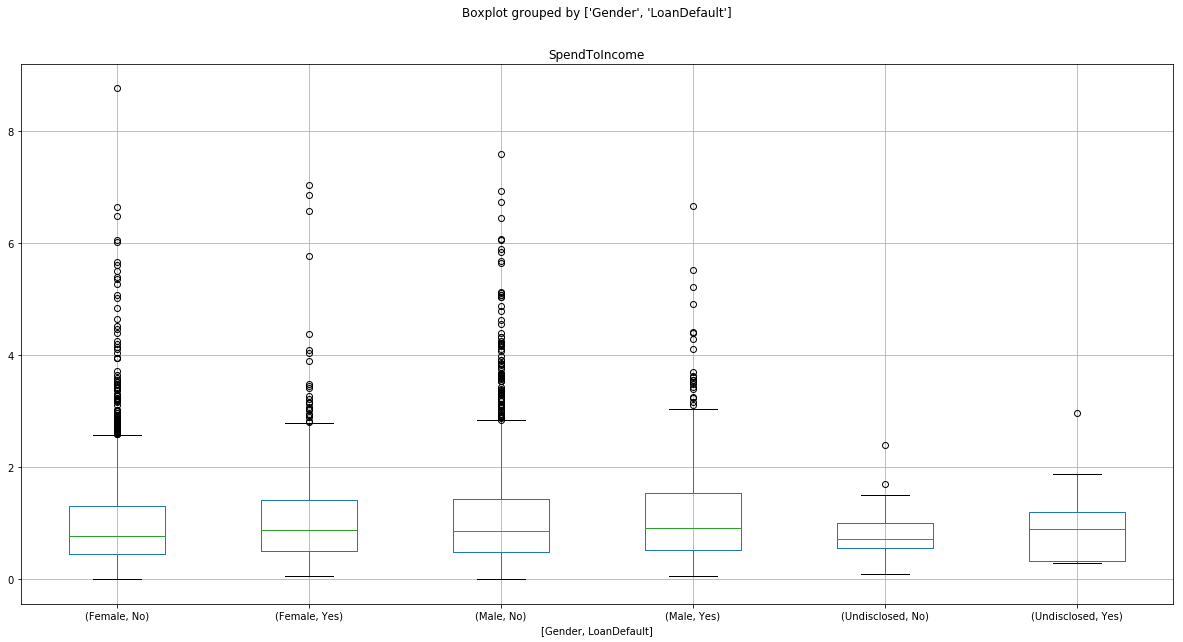

In [14]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Gender
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Gender',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Gender',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Gender and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Gender'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Gender','LoanDefault'])

In [15]:
#Bivariate Analysis of LoanDefault and SpendToIncome
#Looking at SpentToIncomeBrackets
print('\n','Count')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='SpendToIncomeBracket',
               values='SpendToIncome',
              aggfunc='count'))
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='SpendToIncomeBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Spend to Income Brackets and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['SpendToIncomeBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])



 Count


SpendToIncomeBracket  (-0.001, 0.289]  (0.289, 0.419]  (0.419, 0.542]  \
LoanDefault                                                             
No                                399             399             372   
Yes                               101             101             128   

SpendToIncomeBracket  (0.542, 0.685]  (0.685, 0.834]  (0.834, 1.031]  \
LoanDefault                                                            
No                               395             396             378   
Yes                              105             104             122   

SpendToIncomeBracket  (1.031, 1.258]  (1.258, 1.58]  (1.58, 2.152]  \
LoanDefault                                                          
No                               378            373            371   
Yes                              122            127            129   

SpendToIncomeBracket  (2.152, 8.752]  
LoanDefault                           
No                               368  
Yes                              132


 % Column


SpendToIncomeBracket  (-0.001, 0.289]  (0.289, 0.419]  (0.419, 0.542]  \
LoanDefault                                                             
No                               0.80            0.80            0.74   
Yes                              0.20            0.20            0.26   
All                              1.00            1.00            1.00   

SpendToIncomeBracket  (0.542, 0.685]  (0.685, 0.834]  (0.834, 1.031]  \
LoanDefault                                                            
No                              0.79            0.79            0.76   
Yes                             0.21            0.21            0.24   
All                             1.00            1.00            1.00   

SpendToIncomeBracket  (1.031, 1.258]  (1.258, 1.58]  (1.58, 2.152]  \
LoanDefault                                                          
No                              0.76           0.75           0.74   
Yes                             0.24           0.25           0.26   
All                             1.00           1.00           1.00   

SpendToIncomeBracket  (2.152, 8.752]  All  
LoanDefault                                
No                              0.74 0.77  
Yes                             0.26 0.23  
All                             1.00 1.00

Chi-Square: 16.335623747841932
p: 0.06019516850258127



 Mean


AgeBracket   18-25  26-35  36-45  46-55  56-65  65+
LoanDefault                                        
No            1.50   1.18   0.92   0.76   0.92 1.26
Yes           1.52   1.10   0.92   0.73   0.58 0.99


 Count


AgeBracket   18-25  26-35  36-45  46-55  56-65    65+      All
LoanDefault                                                   
No          326.00 560.00 602.00 679.00 706.00 956.00 3,829.00
Yes         389.00 342.00 192.00 130.00  79.00  39.00 1,171.00
All         715.00 902.00 794.00 809.00 785.00 995.00 5,000.00


 % Row


AgeBracket   18-25  26-35  36-45  46-55  56-65  65+  All
LoanDefault                                             
No            0.09   0.15   0.16   0.18   0.18 0.25 1.00
Yes           0.33   0.29   0.16   0.11   0.07 0.03 1.00
All           0.14   0.18   0.16   0.16   0.16 0.20 1.00


 % Column


AgeBracket   18-25  26-35  36-45  46-55  56-65  65+  All
LoanDefault                                             
No            0.46   0.62   0.76   0.84   0.90 0.96 0.77
Yes           0.54   0.38   0.24   0.16   0.10 0.04 0.23
All           1.00   1.00   1.00   1.00   1.00 1.00 1.00

Chi-Square: 802.1091427188089
p: 4.0458057759558325e-171


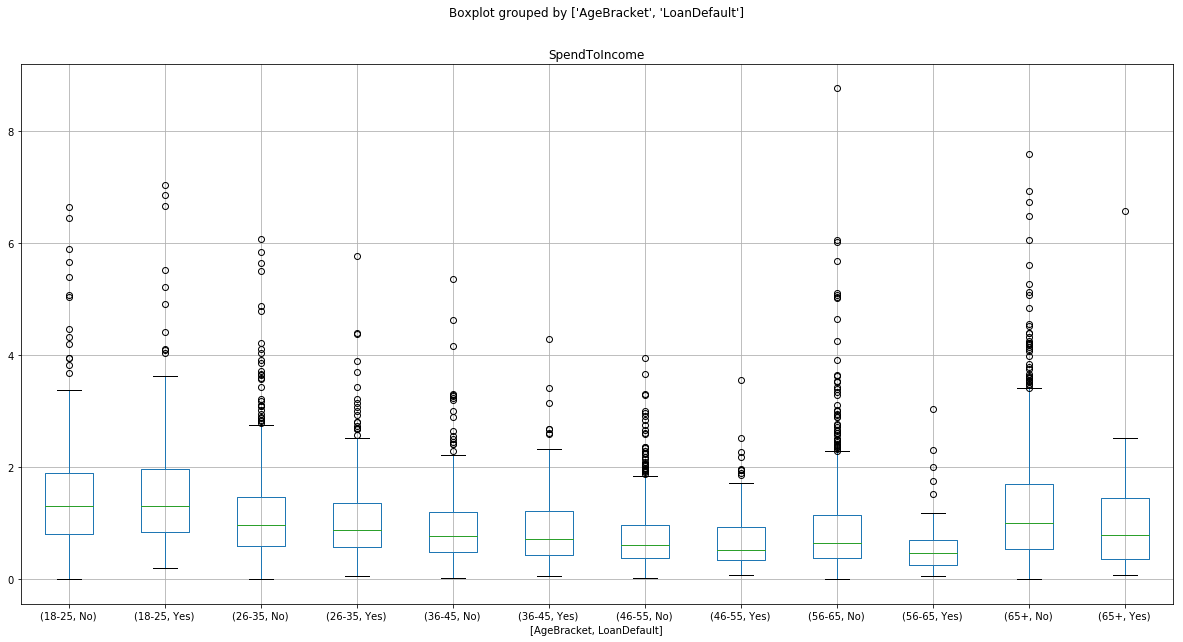

In [16]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by AgeBracket
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='AgeBracket',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='AgeBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Age Brackets and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['AgeBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['AgeBracket','LoanDefault'])


 Mean


EduBracket   1. Elementary  2. Secondary  3. Post-Secondary  4. Graduate
LoanDefault                                                             
No                    1.16          1.13               1.06         1.00
Yes                   1.21          1.24               1.23         0.94


 Count


EduBracket   1. Elementary  2. Secondary  3. Post-Secondary  4. Graduate  \
LoanDefault                                                                
No                  132.00      1,062.00           1,587.00     1,048.00   
Yes                  14.00        205.00             535.00       417.00   
All                 146.00      1,267.00           2,122.00     1,465.00   

EduBracket       All  
LoanDefault           
No          3,829.00  
Yes         1,171.00  
All         5,000.00


 % Row


EduBracket   1. Elementary  2. Secondary  3. Post-Secondary  4. Graduate  All
LoanDefault                                                                  
No                    0.03          0.28               0.41         0.27 1.00
Yes                   0.01          0.18               0.46         0.36 1.00
All                   0.03          0.25               0.42         0.29 1.00


 % Column


EduBracket   1. Elementary  2. Secondary  3. Post-Secondary  4. Graduate  All
LoanDefault                                                                  
No                    0.90          0.84               0.75         0.72 0.77
Yes                   0.10          0.16               0.25         0.28 0.23
All                   1.00          1.00               1.00         1.00 1.00

Chi-Square: 77.18565325272925
p: 1.231906803934201e-16


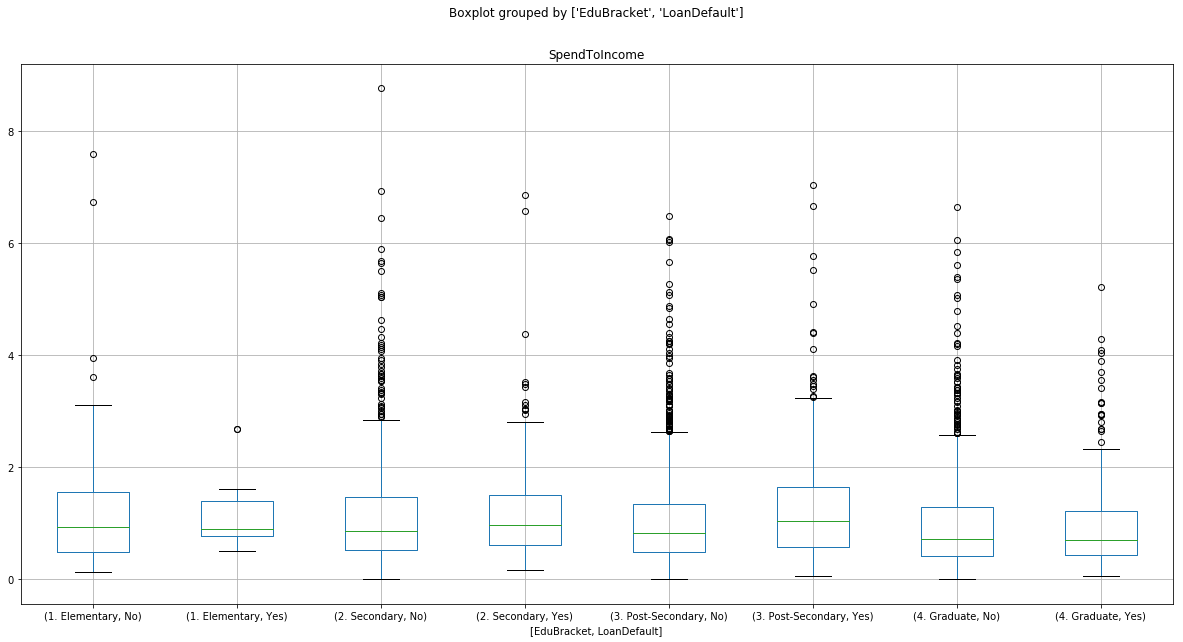

In [17]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Education Level
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='EduBracket',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='EduBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Education Level and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['EduBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['EduBracket','LoanDefault'])


 Mean


Votes         No  Yes
LoanDefault          
No          1.13 1.00
Yes         1.18 1.08


 Count


Votes             No      Yes      All
LoanDefault                           
No          1,860.00 1,969.00 3,829.00
Yes           550.00   621.00 1,171.00
All         2,410.00 2,590.00 5,000.00


 % Row


Votes         No  Yes  All
LoanDefault               
No          0.49 0.51 1.00
Yes         0.47 0.53 1.00
All         0.48 0.52 1.00


 % Column


Votes         No  Yes  All
LoanDefault               
No          0.77 0.76 0.77
Yes         0.23 0.24 0.23
All         1.00 1.00 1.00

Chi-Square: 0.8656736608278639
p: 0.3521558132571775


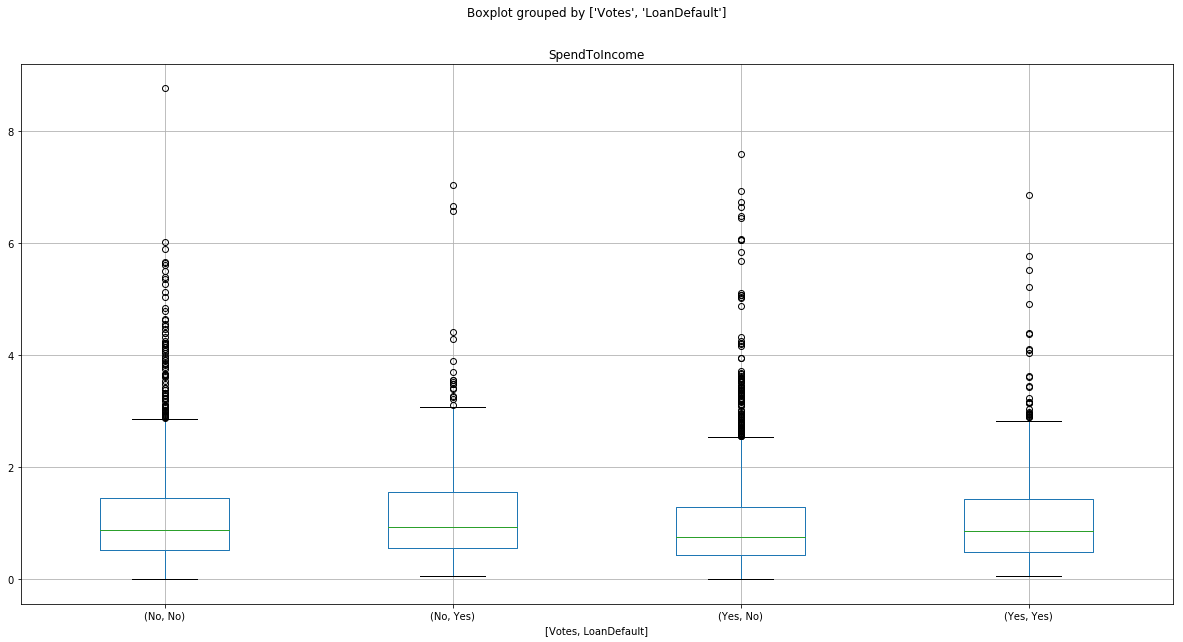

In [18]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Voting History
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Votes',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Votes',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Voting History and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Votes'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Votes','LoanDefault'])

In [19]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Income Brackets
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HHIncomeBracket',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HHIncomeBracket',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Income Bracket and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['HHIncomeBracket'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['HHIncomeBracket','LoanDefault'])


 Mean


HHIncomeBracket  9,000.00   21,000.00  32,000.00  47,000.00  76,000.00
LoanDefault                                                           
No                    1.86       1.26       0.98       0.76       0.49
Yes                   1.79       1.28       1.05       0.76       0.47


 Count


HHIncomeBracket  8999.999  21000.0  32000.0  47000.0  76000.0      All
LoanDefault                                                           
No                 753.00   773.00   713.00   800.00   790.00 3,829.00
Yes                266.00   281.00   243.00   179.00   202.00 1,171.00
All              1,019.00 1,054.00   956.00   979.00   992.00 5,000.00


 % Row


HHIncomeBracket  8999.999  21000.0  32000.0  47000.0  76000.0  All
LoanDefault                                                       
No                   0.20     0.20     0.19     0.21     0.21 1.00
Yes                  0.23     0.24     0.21     0.15     0.17 1.00
All                  0.20     0.21     0.19     0.20     0.20 1.00


 % Column


HHIncomeBracket  8999.999  21000.0  32000.0  47000.0  76000.0  All
LoanDefault                                                       
No                   0.74     0.73     0.75     0.82     0.80 0.77
Yes                  0.26     0.27     0.25     0.18     0.20 0.23
All                  1.00     1.00     1.00     1.00     1.00 1.00

Chi-Square: 31.960669147737384
p: 1.9488352156178697e-06



 Mean


HomeOwner      0    1
LoanDefault          
No          1.16 1.01
Yes         1.18 1.09


 Count


HomeOwner          0        1      All
LoanDefault                           
No          1,395.00 2,434.00 3,829.00
Yes           465.00   706.00 1,171.00
All         1,860.00 3,140.00 5,000.00


 % Row


HomeOwner      0    1  All
LoanDefault               
No          0.36 0.64 1.00
Yes         0.40 0.60 1.00
All         0.37 0.63 1.00


 % Column


HomeOwner      0    1  All
LoanDefault               
No          0.75 0.78 0.77
Yes         0.25 0.22 0.23
All         1.00 1.00 1.00

Chi-Square: 3.983456785936474
p: 0.04594917334653753


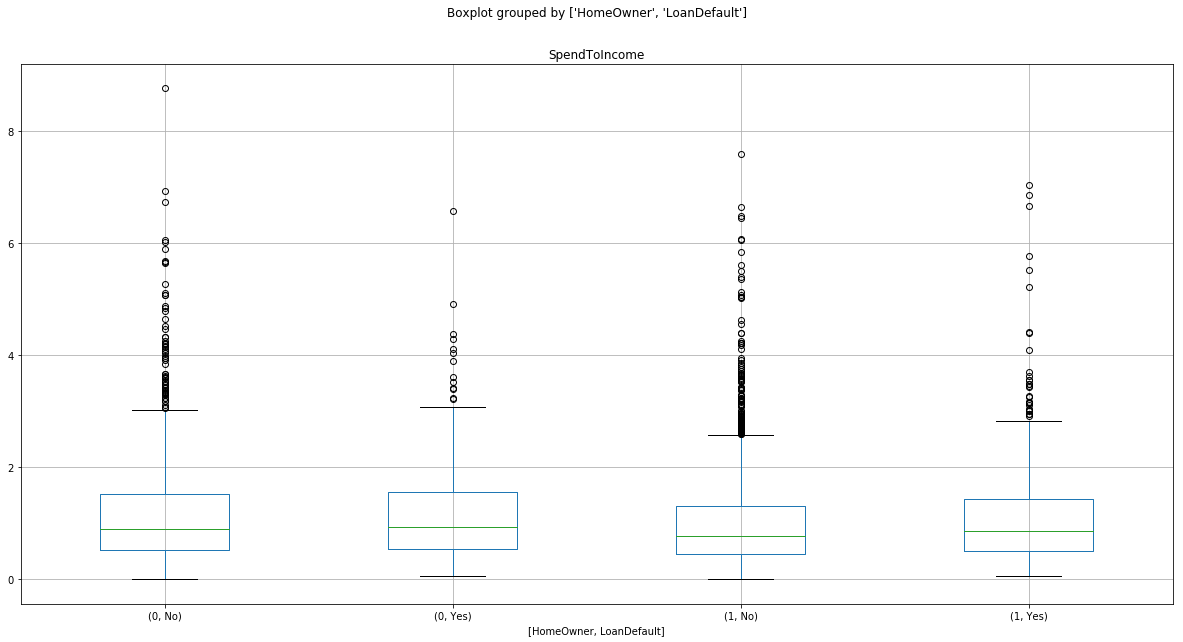

In [20]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Home Ownership
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HomeOwner',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='HomeOwner',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)

#Chi-Square test for independence between Home Ownership and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['HomeOwner'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['HomeOwner','LoanDefault'])


 Mean


Internet       0    1    2    3    4
LoanDefault                         
No          1.08 1.01 1.03 1.13 1.03
Yes         1.13 1.01 1.27 1.13 1.14


 Count


Internet           0      1      2      3      4      All
LoanDefault                                              
No          1,988.00 592.00 403.00 433.00 413.00 3,829.00
Yes           510.00 182.00 142.00 165.00 172.00 1,171.00
All         2,498.00 774.00 545.00 598.00 585.00 5,000.00


 % Row


Internet       0    1    2    3    4  All
LoanDefault                              
No          0.52 0.15 0.11 0.11 0.11 1.00
Yes         0.44 0.16 0.12 0.14 0.15 1.00
All         0.50 0.15 0.11 0.12 0.12 1.00


 % Column


Internet       0    1    2    3    4  All
LoanDefault                              
No          0.80 0.76 0.74 0.72 0.71 0.77
Yes         0.20 0.24 0.26 0.28 0.29 0.23
All         1.00 1.00 1.00 1.00 1.00 1.00

Chi-Square: 32.153966311434914
p: 1.7793692450280008e-06


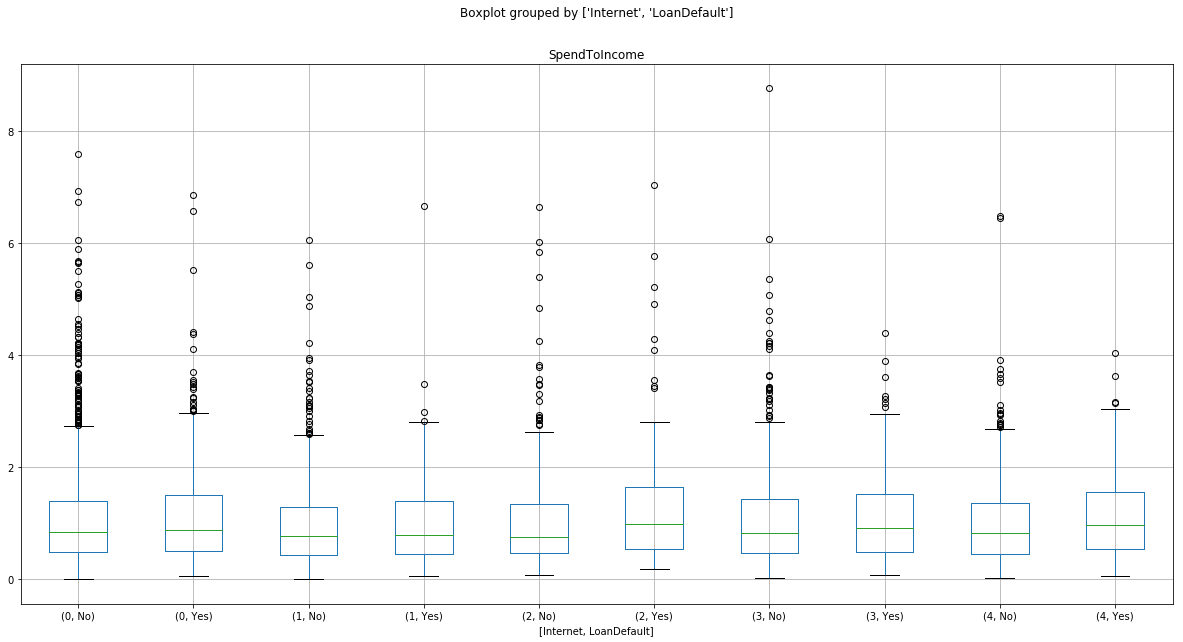

In [21]:
#Multivariate Analysis of LoanDefault and SpendToIncome split by Internet Connected Devices
print('\n','Mean')
display(pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Internet',
               values='SpendToIncome',
              aggfunc=np.mean))
print('\n','Count')
table = pd.pivot_table(df,
               index=['LoanDefault'],
               columns='Internet',
               values='SpendToIncome',
              aggfunc=len,margins=True)
display(table)
table2 = table.div( table.iloc[:,-1], axis=0 )
table3 = table.div( table.iloc[-1,:], axis=1 )
print('\n','% Row')
display(table2)
print('\n','% Column')
display(table3)


#Chi-Square test for independence between Internet Connected Devices and LoanDefault
chisq = scipy.stats.chi2_contingency(pd.crosstab(df['Internet'],df['LoanDefault']))
print('Chi-Square:',chisq[0])
print('p:',chisq[1])

df.boxplot('SpendToIncome',['Internet','LoanDefault'])